<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/module4/firstAproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


In [5]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [20]:
#bikes['dteday'] = pd.to_numeric(bikes.dteday.str.replace('/',''))
  

In [6]:
#### This is the only change important from the previous gist
# Since dates start in 1.1.2011, I make them a measure in days from the first day in the dataset to get 
#the relation between the days in the model. 
bikes['dteday'] = pd.to_datetime(bikes['dteday'])

bikes.info()
bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dteday        16637 non-null  datetime64[ns]
 1   season        16637 non-null  int64         
 2   hr            16637 non-null  int64         
 3   holiday       16637 non-null  int64         
 4   workingday    16637 non-null  int64         
 5   weathersit    16637 non-null  int64         
 6   hum           16637 non-null  float64       
 7   windspeed     16637 non-null  int64         
 8   temp_c        16637 non-null  float64       
 9   feels_like_c  16637 non-null  float64       
 10  casual        16637 non-null  int64         
 11  registered    16637 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1.5 MB


,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,2011-01-01,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,2011-01-01,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,2011-01-01,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,2011-01-01,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,2011-01-01,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,2012-11-30,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,2012-11-30,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,2012-11-30,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,2012-11-30,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


In [7]:
# calculate the difference between the dates in days and months
bikes['dteday'] = (bikes['dteday'] - pd.to_datetime('1/1/2011') )/ np.timedelta64(1,'D')
bikes.info()
bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  float64
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.5 MB


,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,0.0,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,0.0,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,0.0,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,0.0,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,0.0,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,699.0,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,699.0,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,699.0,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,699.0,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


In [8]:
# second possible important update to the data for the network is coding weathersit with get dummies.
bikes =  pd.get_dummies(bikes, columns = ['weathersit'])
bikes.info()
bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  float64
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   hum           16637 non-null  float64
 6   windspeed     16637 non-null  int64  
 7   temp_c        16637 non-null  float64
 8   feels_like_c  16637 non-null  float64
 9   casual        16637 non-null  int64  
 10  registered    16637 non-null  int64  
 11  weathersit_1  16637 non-null  uint8  
 12  weathersit_2  16637 non-null  uint8  
 13  weathersit_3  16637 non-null  uint8  
 14  weathersit_4  16637 non-null  uint8  
dtypes: float64(4), int64(7), uint8(4)
memory usage: 1.5 MB


,dteday,season,hr,holiday,workingday,hum,windspeed,temp_c,feels_like_c,casual,registered,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,1,0,0,0,0.81,0,3.28,3.0014,3,13,1,0,0,0
1,0.0,1,1,0,0,0.80,0,2.34,1.9982,8,32,1,0,0,0
2,0.0,1,2,0,0,0.80,0,2.34,1.9982,5,27,1,0,0,0
3,0.0,1,3,0,0,0.75,0,3.28,3.0014,3,10,1,0,0,0
4,0.0,1,4,0,0,0.75,0,3.28,3.0014,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,699.0,4,19,0,1,0.66,0,7.04,7.0010,18,359,1,0,0,0
16633,699.0,4,20,0,1,0.66,0,7.04,7.0010,12,233,1,0,0,0
16634,699.0,4,21,0,1,0.75,6,6.10,5.0012,14,169,1,0,0,0
16635,699.0,4,22,0,1,0.75,0,6.10,5.9978,18,145,1,0,0,0


In [9]:
bikes['target'] = bikes.casual + bikes.registered
bikes.info()
bikes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  float64
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   hum           16637 non-null  float64
 6   windspeed     16637 non-null  int64  
 7   temp_c        16637 non-null  float64
 8   feels_like_c  16637 non-null  float64
 9   casual        16637 non-null  int64  
 10  registered    16637 non-null  int64  
 11  weathersit_1  16637 non-null  uint8  
 12  weathersit_2  16637 non-null  uint8  
 13  weathersit_3  16637 non-null  uint8  
 14  weathersit_4  16637 non-null  uint8  
 15  target        16637 non-null  int64  
dtypes: float64(4), int64(8), uint8(4)
memory usage: 1.6 MB


,dteday,season,hr,holiday,workingday,hum,windspeed,temp_c,feels_like_c,casual,registered,weathersit_1,weathersit_2,weathersit_3,weathersit_4,target
0,0.0,1,0,0,0,0.81,0,3.28,3.0014,3,13,1,0,0,0,16
1,0.0,1,1,0,0,0.80,0,2.34,1.9982,8,32,1,0,0,0,40
2,0.0,1,2,0,0,0.80,0,2.34,1.9982,5,27,1,0,0,0,32
3,0.0,1,3,0,0,0.75,0,3.28,3.0014,3,10,1,0,0,0,13
4,0.0,1,4,0,0,0.75,0,3.28,3.0014,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,699.0,4,19,0,1,0.66,0,7.04,7.0010,18,359,1,0,0,0,377
16633,699.0,4,20,0,1,0.66,0,7.04,7.0010,12,233,1,0,0,0,245
16634,699.0,4,21,0,1,0.75,6,6.10,5.0012,14,169,1,0,0,0,183
16635,699.0,4,22,0,1,0.75,0,6.10,5.9978,18,145,1,0,0,0,163


In [10]:
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

# Start working with the model

In [11]:
# dividing the set
train_dataset = bikes.sample(frac=0.8, random_state=0)
test_dataset = bikes.drop(train_dataset.index)


In [12]:
test_dataset

,dteday,season,hr,holiday,workingday,hum,windspeed,temp_c,feels_like_c,weathersit_1,weathersit_2,weathersit_3,weathersit_4,target
0,0.0,1,0,0,0,0.81,0,3.28,3.0014,1,0,0,0,16
13,0.0,1,13,0,0,0.72,20,13.62,13.9970,0,1,0,0,94
21,0.0,1,21,0,0,0.87,13,10.80,11.0006,0,1,0,0,34
26,1.0,1,2,0,0,1.00,19,11.74,11.9972,0,1,0,0,9
27,1.0,1,3,0,0,0.94,13,13.62,13.9970,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16606,698.0,4,17,0,1,0.39,13,7.98,5.9978,1,0,0,0,561
16610,698.0,4,21,0,1,0.65,9,4.22,1.9982,1,0,0,0,208
16614,699.0,4,1,0,1,0.70,6,3.28,1.0016,1,0,0,0,19
16623,699.0,4,10,0,1,0.65,0,6.10,5.9978,0,1,0,0,169


In [9]:
train_dataset

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,target
6202,92111,3,0,0,1,1,1.00,0,17.38,18.0032,27
13128,7612,3,5,0,1,1,0.66,13,26.78,30.0020,35
16621,113012,4,8,0,1,2,0.80,6,2.34,1.0016,729
7057,102611,4,16,0,1,2,0.77,6,16.44,17.0000,213
5704,83111,3,3,0,1,1,0.78,0,18.32,18.9998,6
...,...,...,...,...,...,...,...,...,...,...,...
4952,73011,3,6,0,0,1,0.70,20,25.84,28.9988,24
6013,91311,3,3,0,1,1,0.83,0,19.26,20.0030,4
13919,8812,3,4,0,1,1,0.84,0,24.90,28.0022,7
1935,32611,2,10,0,0,1,0.41,11,4.22,1.0016,125


In [13]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dteday,13310.0,351.547483,200.808883,0.00,178.0000,353.00,526.0000,699.0000
season,13310.0,2.483471,1.085768,1.00,2.0000,2.00,3.0000,4.0000
hr,13310.0,11.529076,6.907057,0.00,6.0000,12.00,18.0000,23.0000
holiday,13310.0,0.028625,0.166757,0.00,0.0000,0.00,0.0000,1.0000
workingday,13310.0,0.685575,0.464304,0.00,0.0000,1.00,1.0000,1.0000
hum,13310.0,0.626212,0.193198,0.00,0.4700,0.63,0.7800,1.0000
windspeed,13310.0,12.738317,8.179928,0.00,7.0000,13.00,17.0000,57.0000
temp_c,13310.0,15.706998,9.031127,-7.06,7.9800,16.44,23.0200,38.0600
feels_like_c,13310.0,15.831020,11.309288,-16.00,5.9978,17.00,24.9992,48.9968
weathersit_1,13310.0,0.662059,0.473026,0.00,0.0000,1.00,1.0000,1.0000


In [14]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('target')
test_labels = test_features.pop('target')


In [15]:
test_features

,dteday,season,hr,holiday,workingday,hum,windspeed,temp_c,feels_like_c,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.0,1,0,0,0,0.81,0,3.28,3.0014,1,0,0,0
13,0.0,1,13,0,0,0.72,20,13.62,13.9970,0,1,0,0
21,0.0,1,21,0,0,0.87,13,10.80,11.0006,0,1,0,0
26,1.0,1,2,0,0,1.00,19,11.74,11.9972,0,1,0,0
27,1.0,1,3,0,0,0.94,13,13.62,13.9970,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16606,698.0,4,17,0,1,0.39,13,7.98,5.9978,1,0,0,0
16610,698.0,4,21,0,1,0.65,9,4.22,1.9982,1,0,0,0
16614,699.0,4,1,0,1,0.70,6,3.28,1.0016,1,0,0,0
16623,699.0,4,10,0,1,0.65,0,6.10,5.9978,0,1,0,0


3327

In [16]:
test_labels

0         16
13        94
21        34
26         9
27         6
        ... 
16606    561
16610    208
16614     19
16623    169
16634    183
Name: target, Length: 3327, dtype: int64

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [17]:
normalizer = tf.keras.layers.Normalization(axis=-1)



Create a two-step Keras Sequential model again with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) you defined earlier and adapted to the whole dataset:

In [62]:
normalizer.adapt(np.array(train_features))

In [18]:

linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

When you call `Model.predict` on a batch of inputs, it produces `units=1` outputs for each example:

In [19]:
linear_model.predict(train_features[:10])

array([[160.547],
       [321.52 ],
       [397.343],
       [171.417],
       [147.918],
       [118.924],
       [345.366],
       [112.916],
       [  4.394],
       [380.654]], dtype=float32)

Configure the model with Keras `Model.compile` and train with `Model.fit` for 100 epochs:

In [20]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [21]:

history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Visualize the model's training progress using the stats stored in the `history` object:

In [22]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,102.368660,103.803253,95
96,102.841591,103.869110,96
97,102.494049,103.966881,97
98,102.218681,105.426971,98
99,102.837021,103.365471,99


In [23]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([50, 250])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

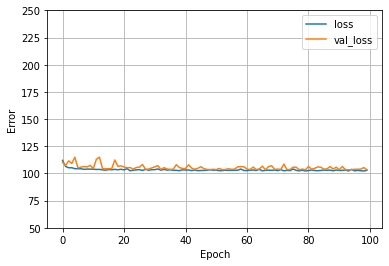

In [24]:
plot_loss(history)

In [25]:
test_results = {}

test_results['bikes_evaluation'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [26]:
test_results

{'bikes_evaluation': 99.30744934082031}

In [27]:
predictions = linear_model.predict(test_features)


In [28]:
predictions

array([[-70.632],
       [109.214],
       [129.182],
       ...,
       [ 38.634],
       [147.226],
       [195.215]], dtype=float32)

In [29]:
test_labels

0         16
13        94
21        34
26         9
27         6
        ... 
16606    561
16610    208
16614     19
16623    169
16634    183
Name: target, Length: 3327, dtype: int64

From here on is experimental, this template can help with the testing after we understand each component. It was borrowed from : https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/  . It is for multi outputs, something we don need now, but run just with one output. The test can take longer because uses cross validations, start with few numbers like 2 or 3 to see how long it takes. 

In [ ]:
# Template to start to work with 

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
 
# get the dataset ( change to get the training features and training targets)
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, n_targets=3, random_state=2)
	return X, y
 
# get the model 
# This function creates a model , in our case we dont need to use n_inputs or outputs
# I leave the template like it cames because is so complete that we can use it in the future 
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs))
	model.compile(loss='mae', optimizer='adam')
	return model
 
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X, y):
	results = list()
	n_inputs, n_outputs = X.shape[1], y.shape[1]
	# define evaluation procedure
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	# enumerate folds
	for train_ix, test_ix in cv.split(X):
		# prepare data
		X_train, X_test = X[train_ix], X[test_ix]
		y_train, y_test = y[train_ix], y[test_ix]
		# define model
		model = get_model(n_inputs, n_outputs)
		# fit model
		model.fit(X_train, y_train, verbose=0, epochs=100)
		# evaluate model on test set
		mae = model.evaluate(X_test, y_test, verbose=0)
		# store result
		print('>%.3f' % mae)
		results.append(mae)
	return results
 
# load dataset
X, y = get_dataset()
# evaluate model
results = evaluate_model(X, y)
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(results), std(results)))